# 입문자를 위한, 파이썬/R 데이터 분석  

## Part(2) - Day20  :

]

## Today's mission

- Ensemble Learinig (개념, 하드보팅, 소프트보팅)
- ML 데이터 처리 관련 추가정리 (LabelEncoder, Scaler, Validation)
- 변수선택법(Feature Selection)

]

## Label Encoder

In [ ]:
items = ['냉장고', '에어컨', ' TV', '컴퓨터', '에어컨', ' TV', '컴퓨터']
items

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
encoder = LabelEncoder()
encoder

In [ ]:
encoder.fit(items)

In [ ]:
result = encoder.transform(items)

In [ ]:
print(encoder.classes_, result)

In [ ]:
encoder.inverse_transform([1, 2, 0, 3, 2, 0, 3])

### vs. OneHot Encoder

In [ ]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [ ]:
items

In [ ]:
encoder = LabelEncoder()
encoder.fit(items)

In [ ]:
result = encoder.transform(items)
result

In [ ]:
label = np.array(result).reshape(-1,1)
label

In [ ]:
on_hot = OneHotEncoder()

In [ ]:
on_hot.fit(label)

In [ ]:
on_hot.transform(label)

In [ ]:
print(encoder.classes_)

In [ ]:
print(label)

In [ ]:
on_hot.transform(label).toarray()

## Scaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [ ]:
from sklearn.datasets import load_iris
import pandas as pd

In [ ]:
iris = load_iris()
df_iris = pd.DataFrame(iris.data)
df_iris.head(3)

In [ ]:
df_iris

In [ ]:
df_iris.describe()

In [ ]:
### 데이터 5.1에 대해서 MinMax Scaling
(5.1 - 4.3) / (7.9 - 4.3)

참고 : https://mkjjo.github.io/python/2019/01/10/scaler.html

In [ ]:
m_scaler = MinMaxScaler()
s_scaler = StandardScaler()

In [ ]:
m_scaler.fit(df_iris)

In [ ]:
m_scaler.transform(df_iris)

In [ ]:
s_scaler.fit(df_iris)

In [ ]:
s_scaler.transform(df_iris)

## Validation

In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [ ]:
iris = load_iris()
X_train = iris.data
y_train = iris.target

In [ ]:
X_train

In [ ]:
y_train

In [ ]:
dt_clf = DecisionTreeClassifier()
dt_clf

In [ ]:
X1, X_test, y1, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=222)

In [ ]:
dt_clf.fit(X1, y1)

In [ ]:
print(X_test)#, X_test, y1, y_test)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
pred = dt_clf.predict(X_test)
pred

In [ ]:
accuracy_score(y_test, pred)

참고 : https://blog.naver.com/sjy5448/222457108646

In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, cross_val_score

In [ ]:
iris = load_iris()
X_train = iris.data
y_train = iris.target

In [ ]:
dt_clf = DecisionTreeClassifier()

In [ ]:
kfold = KFold(n_splits=5)
kfold

In [ ]:
scores = cross_val_score(dt_clf, X_train, y_train, cv=5, scoring = 'accuracy')
print(scores, '\n',
      scores.mean())

## 변수선택법(Feature Selection)

- 참고 : https://zephyrus1111.tistory.com/65

In [ ]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [ ]:
## Data Import
df = pd.read_csv('data/surgical_unit.csv') ## 데이터 불러오기

In [ ]:
df.head()

In [ ]:
df.info()

### 전진 선택법(Forward Selection)
- 전진 선택법은 기존 모형에 가장 설명력이 좋은 변수를 하나씩 추가하는 방법
- 장점 : 전진 선택법은 구현 과정이 간단하고 변수가 많은 상황에서도 사용할 수 있다
- 단점 : 한번 선택된 변수는 계속 모형에 존재하며, 일치성(샘플수가 많아질수록 실제 모형에 수렴하는 성질)이 만족되지 않는다

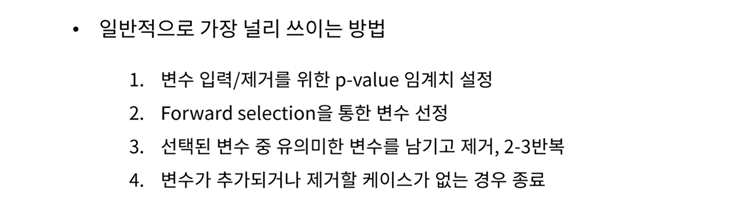

In [ ]:
import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
## 전진 선택법
variables = df.columns[:-2].tolist() ## 설명 변수 리스트
variables

In [ ]:
y = df['Survival_Time'] ## 반응 변수
selected_variables = [] ## 선택된 변수들
sl_enter = 0.05

In [ ]:
sv_per_step = [] ## 각 스텝별로 선택된 변수들
adjusted_r_squared = [] ## 각 스텝별 수정된 결정계수
steps = [] ## 스텝
step = 0

In [ ]:
while len(variables) > 0:
    remainder = list(set(variables) - set(selected_variables))
    pval = pd.Series(index=remainder) ## 변수의 p-value
    ## 기존에 포함된 변수와 새로운 변수 하나씩 돌아가면서 
    ## 선형 모형을 적합한다.
    for col in remainder: 
        X = df[selected_variables+[col]]
        X = sm.add_constant(X)
        model = sm.OLS(y,X).fit()
        pval[col] = model.pvalues[col]
 
    min_pval = pval.min()
    if min_pval < sl_enter: ## 최소 p-value 값이 기준 값보다 작으면 포함
        selected_variables.append(pval.idxmin())
        
        step += 1
        steps.append(step)
        adj_r_squared = sm.OLS(y,sm.add_constant(df[selected_variables])).fit().rsquared_adj
        adjusted_r_squared.append(adj_r_squared)
        sv_per_step.append(selected_variables.copy())
    else:
        break

In [ ]:
### 선택 변수 확인
selected_variables

In [ ]:
fig = plt.figure(figsize=(10,10))
fig.set_facecolor('white')
 
font_size = 15
plt.xticks(steps,[f'step {s}\n'+'\n'.join(sv_per_step[i]) for i,s in enumerate(steps)], fontsize=12)
plt.plot(steps,adjusted_r_squared, marker='o')
    
plt.ylabel('Adjusted R Squared',fontsize=font_size)
plt.grid(True)
plt.show()

### 후진 소거법(Backward Elimination)
- 전진 선택법과는 반대로 모든 변수가 포함된 모형에서 설명력이 가정 적은 변수를 제거해나가는 방벙
- 장점 : 후진 소거법 또한 전진 선택법과 마찬가지로 구현 과정이 간단하고 변수가 많은 데이터에 적용 가능하다
- 단점 : 하지만 한번 제외된 변수는 다시는 모형에 포함될 수 없으며, 일치성을 만족하지 않는다

In [ ]:
## 후진 소거법
variables = df.columns[:-2].tolist() ## 설명 변수 리스트
variables

In [ ]:
y = df['Survival_Time'] ## 반응 변수
selected_variables = variables ## 초기에는 모든 변수가 선택된 상태
sl_remove = 0.05 

In [ ]:
sv_per_step = [] ## 각 스텝별로 선택된 변수들
adjusted_r_squared = [] ## 각 스텝별 수정된 결정계수
steps = [] ## 스텝
step = 0

In [ ]:
while len(selected_variables) > 0:
    X = sm.add_constant(df[selected_variables])
    p_vals = sm.OLS(y,X).fit().pvalues[1:] ## 절편항의 p-value는 뺀다
    max_pval = p_vals.max() ## 최대 p-value
    if max_pval >= sl_remove: ## 최대 p-value값이 기준값보다 크거나 같으면 제외
        remove_variable = p_vals.idxmax()
        selected_variables.remove(remove_variable)
 
        step += 1
        steps.append(step)
        adj_r_squared = sm.OLS(y,sm.add_constant(df[selected_variables])).fit().rsquared_adj
        adjusted_r_squared.append(adj_r_squared)
        sv_per_step.append(selected_variables.copy())
    else:
        break

In [ ]:
selected_variables

In [ ]:
fig = plt.figure(figsize=(10,10))
fig.set_facecolor('white')
 
font_size = 15
plt.xticks(steps,[f'step {s}\n'+'\n'.join(sv_per_step[i]) for i,s in enumerate(steps)], fontsize=12)
plt.plot(steps,adjusted_r_squared, marker='o')
    
plt.ylabel('Adjusted R Squared',fontsize=font_size)
plt.grid(True)
plt.show()

### 단계별 선택법(Forward Stepwise Selection)
- 전진 선택법에서 후진 소거법을 추가한 방법
- 장점 : 단계별 선택법은 구현 과정이 간단하고 한번 들어간 변수는 계속 포함된다는 전진 선택법의 단점을 일부 보완했다
- 단점 : 하지만  변수가 많아지면 계산량이 늘어난다는 것, 일치성을 만족하지 않는다

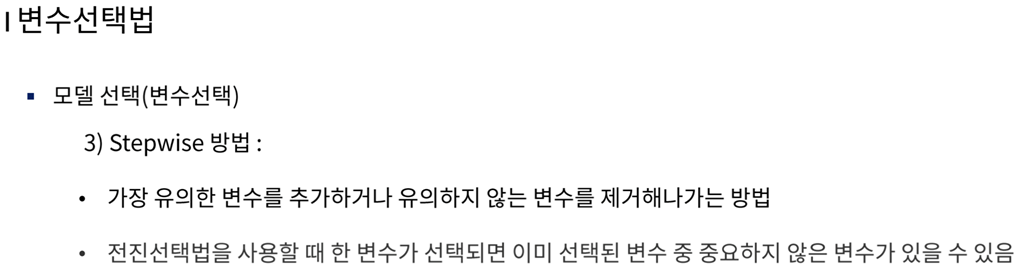

**만약 변수 선택법을 수행해야 한다면 전진 선택법, 후진 소거법 보다는 단계별 선택법을 사용하시길 추천**   
**변수를 선택하는 것은 객관적인 이론은 없고 단순히 경험과 분석자의 판단에 많이 의존하는 경우가 많음**

In [ ]:
## 전진 단계별 선택법
variables = df.columns[:-2].tolist() ## 설명 변수 리스트
variables

In [ ]:
y = df['Survival_Time'] ## 반응 변수
selected_variables = [] ## 선택된 변수들
sl_enter = 0.05
sl_remove = 0.05

In [ ]:
sv_per_step = [] ## 각 스텝별로 선택된 변수들
adjusted_r_squared = [] ## 각 스텝별 수정된 결정계수
steps = [] ## 스텝
step = 0

In [ ]:
while len(variables) > 0:
    remainder = list(set(variables) - set(selected_variables))
    pval = pd.Series(index=remainder) ## 변수의 p-value
    ## 기존에 포함된 변수와 새로운 변수 하나씩 돌아가면서 
    ## 선형 모형을 적합한다.
    for col in remainder: 
        X = df[selected_variables+[col]]
        X = sm.add_constant(X)
        model = sm.OLS(y,X).fit()
        pval[col] = model.pvalues[col]
 
    min_pval = pval.min()
    if min_pval < sl_enter: ## 최소 p-value 값이 기준 값보다 작으면 포함
        selected_variables.append(pval.idxmin())
        ## 선택된 변수들에대해서
        ## 어떤 변수를 제거할지 고른다.
        while len(selected_variables) > 0:
            selected_X = df[selected_variables]
            selected_X = sm.add_constant(selected_X)
            selected_pval = sm.OLS(y,selected_X).fit().pvalues[1:] ## 절편항의 p-value는 뺀다
            max_pval = selected_pval.max()
            if max_pval >= sl_remove: ## 최대 p-value값이 기준값보다 크거나 같으면 제외
                remove_variable = selected_pval.idxmax()
                selected_variables.remove(remove_variable)
            else:
                break
        
        step += 1
        steps.append(step)
        adj_r_squared = sm.OLS(y,sm.add_constant(df[selected_variables])).fit().rsquared_adj
        adjusted_r_squared.append(adj_r_squared)
        sv_per_step.append(selected_variables.copy())
    else:
        break

In [ ]:
selected_variables

In [ ]:
fig = plt.figure(figsize=(10,10))
fig.set_facecolor('white')
 
font_size = 15
plt.xticks(steps,[f'step {s}\n'+'\n'.join(sv_per_step[i]) for i,s in enumerate(steps)], fontsize=12)
plt.plot(steps,adjusted_r_squared, marker='o')
    
plt.ylabel('Adjusted R Squared',fontsize=font_size)
plt.grid(True)
plt.show()

### 데이터 종류 : 범주형 vs 연속형

- 척도 : 대상의 특성을 통계상의 수로 표현하기 위해 체계적으로 그 속성에 숫자를 부여한 것

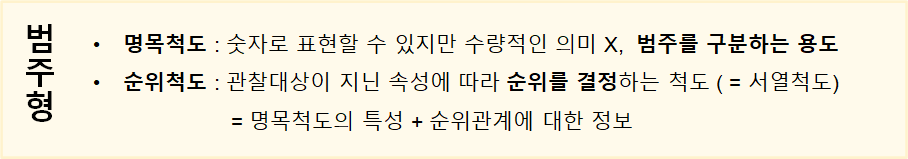
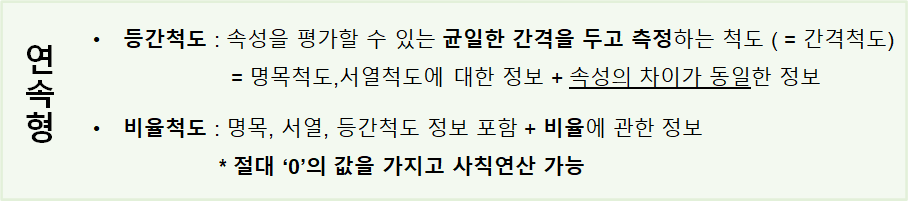
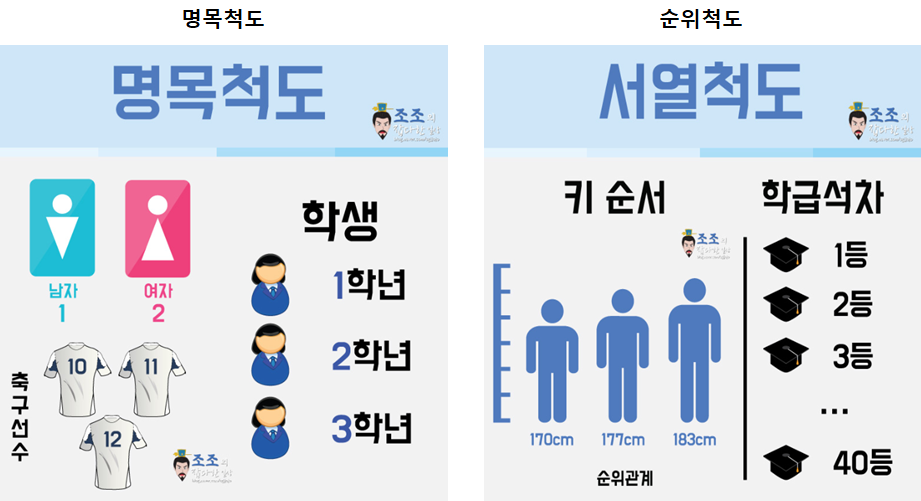
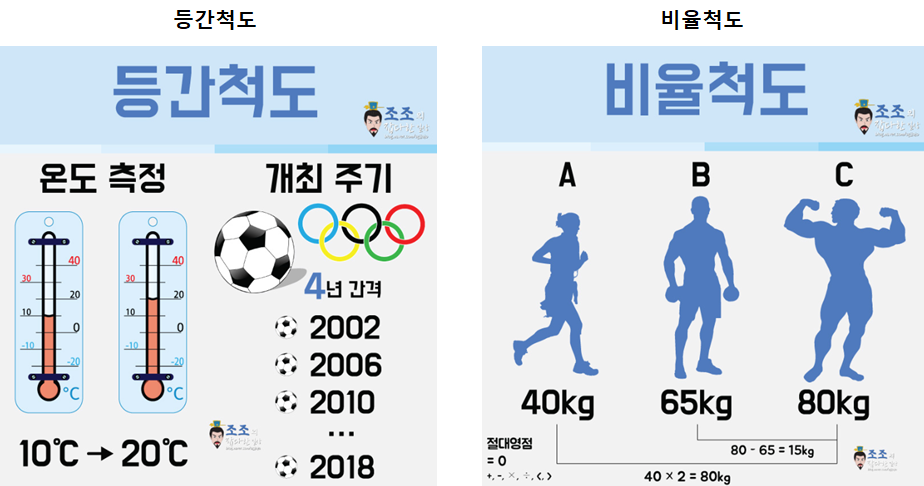
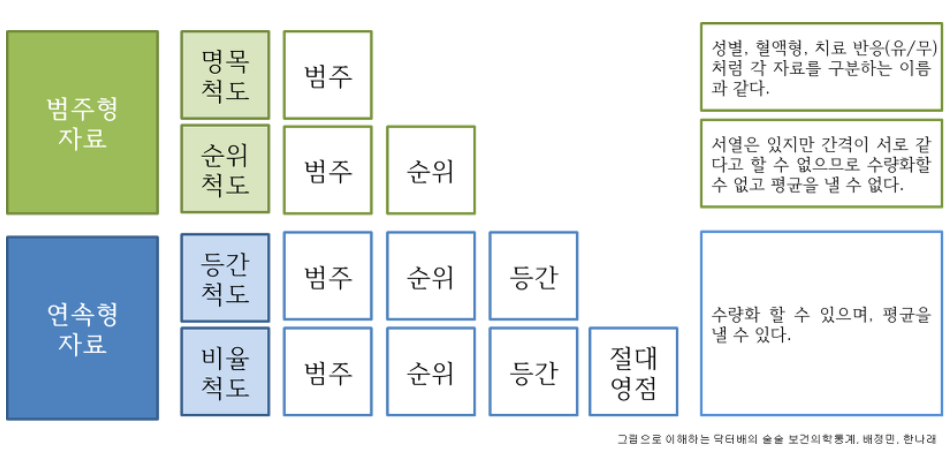